In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import signal
from sklearn import preprocessing
from scipy import fft
from sklearn import model_selection
from sklearn import svm
from sklearn import discriminant_analysis
from sklearn import metrics
%matplotlib inline

## todo: Make notebook as close to solution as possible

## Problem 1 (5 Points)

Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### Problem 1a

Use the pandas library to load the `.csv` file as a data frame and display its contents.

See:

[`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

[`pandas.DataFrame.head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [3]:
df = pd.read_csv('assignment_data.csv')
#print(df) # this prints the first and last few columns and rows
print(df.head()) 

   y          0          1          2          3          4          5   
0  0  22.979065  28.018860  28.018860  17.999268  -1.979919 -28.018860  \
1  0  -2.999878   1.019958   1.019958  -1.019958  -1.019958  -1.979919   
2  0  17.999268  25.978943  17.999268  22.019104  14.999390  34.978577   
3  0  44.998169  41.998291  32.998657  26.998901  22.979065  17.999268   
4  0  17.999268  25.018982  43.018250  55.977722  52.017883  50.997925   

           6          7          8  ...        168        169        170   
0 -44.998169 -58.977600 -52.977844  ... -29.998779 -37.018494 -38.998413  \
1  -8.999634 -10.019592 -19.979187  ...  40.978333  28.978821  19.979187   
2  64.017395  82.976624  88.016418  ...  25.978943  19.019226  14.999390   
3   7.019714  -1.019958  -7.979675  ... -49.977966 -55.017761 -59.997559   
4  43.978210  43.978210  34.978577  ...  40.978333  50.997925  61.017517   

         171        172        173        174        175        176        177  
0 -46.018127 -41.

### Problem 1b

Split the data frame into two frames: one for seizure-positive (y = 1) and one for negative (y = 0). Call the frame with the positives `X_pos` and call the frame with the negatives `X_neg`. Each row of the dataframe corresponds to a time series. Then print out the mean and standard deviation of the first time series of each dataframe. 

See:

[`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

[`pandas.DataFrame.query`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)

[`pandas.DataFrame.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

[`pandas.DataFrame.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [4]:
X_pos = df.query('y == 1').reset_index(drop=True).iloc[:, 1:]
X_neg = df.query('y == 0').reset_index(drop=True).iloc[:, 1:]

# print(type(X_pos))
# print(type(X_neg))
#print(X_pos.loc[0])
#print(X_neg.loc[0])


pos_first = X_pos.loc[0]
neg_first = X_neg.loc[0]

#print(pos_first)

print(pos_first.mean())
print(pos_first.std())
print(neg_first.mean())
print(neg_first.std())

-62.71362784739291
198.37456633387248
-16.323043651795118
38.05977832900184


### Problem 1c

Plot the first three seizure-positive and seizure-negative times series in the positive and negative dataframes you made in part b (each row is a time series). In a 3x2 panel where the first column is seizure-negative, the second seizure-positive. We recommend a figure size of 14 x 12 (see the documentation of `plt.subplots` for more details on how to set the figure size)

See:

   [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

   [`matplotlib.axes.Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)

   [`matplotlib.axes.Axes.set_xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)


Comments:



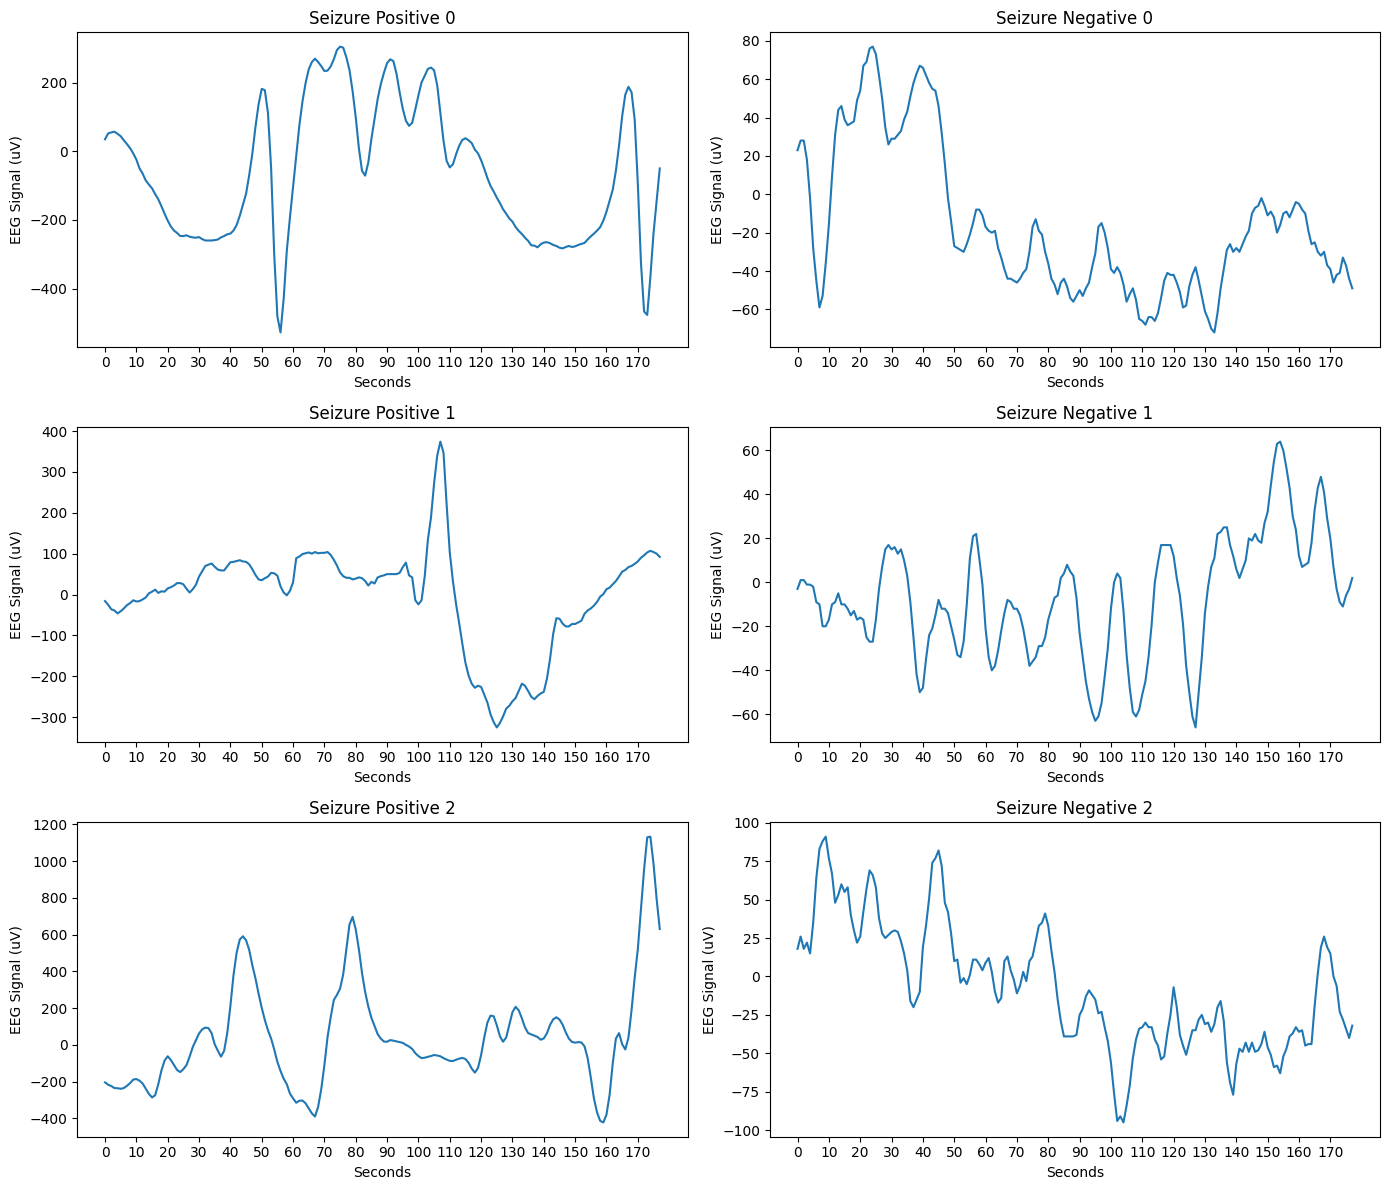

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
#fig, ax = plt.subplots()

#print(type(pos_plot))

#pos_plot.plot(ax=ax)
xticks = np.arange(0, 178, 10)

for i in range(3):
    axs[i, 0].plot(X_pos.loc[i])
    axs[i, 0].set_title('Seizure Positive ' + str(i))
    axs[i, 0].set_xticks(xticks)
    axs[i, 0].set_xlabel('Seconds')
    axs[i, 0].set_ylabel('EEG Signal (uV)')
    
for j in range(3):
    axs[j, 1].plot(X_neg.loc[j])
    axs[j, 1].set_title('Seizure Negative ' + str(j))
    axs[j, 1].set_xticks(xticks)
    axs[j, 1].set_xlabel('Seconds')
    axs[j, 1].set_ylabel('EEG Signal (uV)')

plt.tight_layout()

## Problem 2 (5 points)

### Problem 2a (0.5 Points)

In order to perform spectral analysis of the data, we will need to seperate out the the data from the dataframe into arrays. Seperate out the data into a label array `y` data array `X`. 

See:

[`pandas.DataFrame.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

[`pandas.DataFrame.values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)

In [6]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
X_pos_ary = X_pos.to_numpy()
X_neg_ary = X_neg.to_numpy()
#print(y)

### Problem 2b (2 Points)

A spectogram gives a respresent of the frequency characteristics (but not necessarily the exact frequencies).

Plot a spectrogram using a wavelet transform of two segment of the first time series in the `df_pos` and `df_neg` dataframes. Make sure to add a colorbar showing the amplitude, and to accurately label the time on the x-axis.

The widths parameter is typically manually tailored to provide good resolution for the frequency characteristics. 

Use `widths = np.arange(0.5, 20, 0.5)` and `cmap = 'jet'`.

See:

[`scipy.signal.cwt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html)


[`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

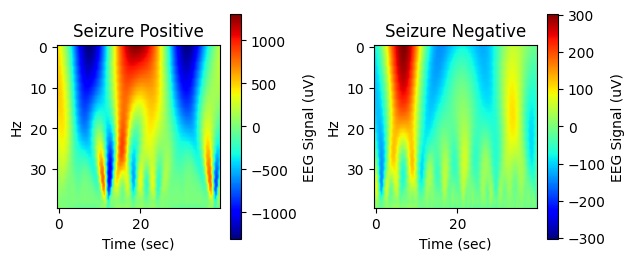

In [7]:
widths = np.arange(0.5, 20, 0.5)
#extent = [-0.5, 177-0.5, 40-0.5, -0.5]
extent = [-0.5, 40-0.5, 40-0.5, -0.5]

#print(X_pos_ary[0])

fig, ax = plt.subplots(1, 2)

mtr = signal.cwt(X_pos_ary[0], signal.ricker, widths)
mtr_fy = np.flipud(mtr)
#print(mtr_fy)
#ax = plt.subplot(121)
im1 = ax[0].imshow(mtr_fy, cmap='jet', vmin=-abs(mtr).max(), vmax=abs(mtr).max(), extent=extent)
ax[0].set_title('Seizure Positive')
ax[0].set_xlabel('Time (sec)')
ax[0].set_ylabel('Hz')

mtr = signal.cwt(X_neg_ary[0], signal.ricker, widths)
mtr_fy = np.flipud(mtr)
#ax = plt.subplot(122)
im2 = ax[1].imshow(mtr_fy, cmap='jet', vmin=-abs(mtr).max(), vmax=abs(mtr).max(), extent=extent)
ax[1].set_title('Seizure Negative')
ax[1].set_xlabel('Time (sec)')
ax[1].set_ylabel('Hz')

#div = make_axes_locatable(ax)
#plt.subplots_adjust(bottom=0.1, right=1.0, top=0.9)
#cax = div.append_axes('right', size="20%", pad=3.0)
#cax = plt.axes([1.0, 0.1, 0.075, 0.8])
cb1 = fig.colorbar(im1, ax=ax[0], label='EEG Signal (uV)', shrink=0.5)
cb2 = fig.colorbar(im2, ax=ax[1], label='EEG Signal (uV)', shrink=0.5)

fig.tight_layout()


### Problem 2c (2 points)

Now we'll try a slightly different technique. Using a Short Time Fourier Transform (STFT), plot a spectogram the first time series in the `X_pos` and `X_neg` dataframes. Make sure to add a colorbar showing the amplitude, and to accurately label the frequency range on the y axis. 

The sampling frequency is `fs = 178`

See:

[`scipy.signal.stft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html)

[`matplotlib.pyplot.pcolormesh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)

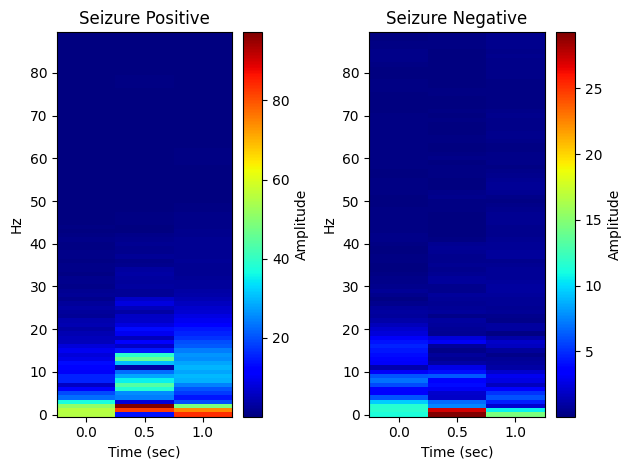

In [8]:
fig, ax = plt.subplots(1, 2)

f, t, Zxx = signal.stft(X_pos_ary[0], fs=178, nperseg=178)
pcm1 = ax[0].pcolormesh(t, f, np.abs(Zxx), cmap='jet')
ax[0].set_title('Seizure Positive')
ax[0].set_xlabel('Time (sec)')
ax[0].set_ylabel('Hz')


f, t, Zxx = signal.stft(X_neg_ary[0], fs=178, nperseg=178)
pcm2 = ax[1].pcolormesh(t, f, np.abs(Zxx), cmap='jet')
ax[1].set_title('Seizure Negative')
ax[1].set_xlabel('Time (sec)')
ax[1].set_ylabel('Hz')

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
cb1 = fig.colorbar(pcm1, label='Amplitude')
cb2 = fig.colorbar(pcm2, label='Amplitude')

fig.tight_layout()

### Problem 2d (0.5 Points)

What do you notice (or not notice?) about the spectrogram during a seizure? What differences do you notice between the the wavelet transform and STFT? Why might that be the case knowing the differences between the two transforms?

There seems to be a stronger amplitude with seizure positive data than with seizure negative data.

The wavelet transform has more variation, more information because it displays all changes over time. However, the point of the STFT is to simplify and summarize, which removes features.

# Problem 3 (5 points)

### Problem 3a (1 point)

Normalize the EEG data so they have zero mean and unit variance. Call the normalized data `X_norm`.

See:

[`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html)

In [9]:
scaler = preprocessing.StandardScaler().fit(X)
#print(scaler.mean_)
#print(scaler.scale_)
X_norm = scaler.transform(X)
print(X_norm.mean(axis=0))
print(X_norm.std(axis=0))
#fig, ax = plt.subplots(2, 2)
# ax[0,0].plot(X_norm[0])
# ax[0,1].plot(X.loc[0])
# ax[1,0].plot(X_norm[1])
# ax[1,1].plot(X.loc[1])

[ 1.61515222e-17  2.48484957e-18 -6.21212394e-18  1.49090974e-17
  3.72727436e-18  1.30454603e-17  4.96969915e-18 -1.24242479e-18
  7.45454872e-18 -2.48484957e-18 -8.69697351e-18 -3.10606197e-18
 -3.10606197e-18  3.10606197e-19  1.24242479e-18  9.31818590e-18
 -7.14394253e-18  0.00000000e+00  9.31818590e-19  9.93939830e-18
 -1.24242479e-18  0.00000000e+00  9.31818590e-19  6.83333633e-18
 -2.48484957e-18  1.24242479e-18 -8.69697351e-18 -1.55303098e-18
  6.21212394e-18  1.86363718e-18  6.21212394e-19  1.24242479e-18
 -9.31818590e-19 -2.79545577e-18  6.52273013e-18  2.48484957e-18
 -6.83333633e-18  2.48484957e-18 -9.00757971e-18 -3.10606197e-19
 -9.00757971e-18  4.03788056e-18  3.10606197e-19 -9.31818590e-19
 -1.42878851e-17 -2.48484957e-18  3.41666816e-18  7.76515492e-19
  9.31818590e-19  1.36666727e-17 -1.86363718e-18 -1.30454603e-17
 -7.45454872e-18 -1.24242479e-18 -8.69697351e-18  1.24242479e-18
  0.00000000e+00  9.31818590e-18 -3.72727436e-18  3.72727436e-18
  0.00000000e+00  4.96969

### Problem 3b (1 point)

Plot the distribution of labels in the dataset. Recall that `y = 1` represents seizure events and `y = 0` represents nominal activity. Plot the distribution of labels using a histogram. Notice that the distribution of labels isn't balanced. What kinds of problems might arise due to this?

See: 

[`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

[What is Imbalanced Classification?](https://machinelearningmastery.com/what-is-imbalanced-classification/)

Having an uneven balance between positive and negative sample sizes for training a classifier can cause it to be biased for the data that is most represented and make false positives and false negatives more likely.

Text(0, 0.5, 'Events')

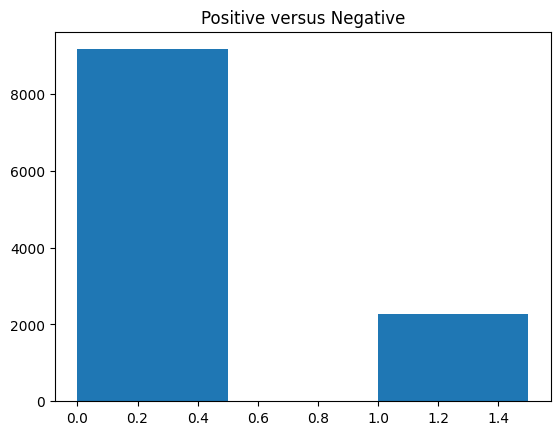

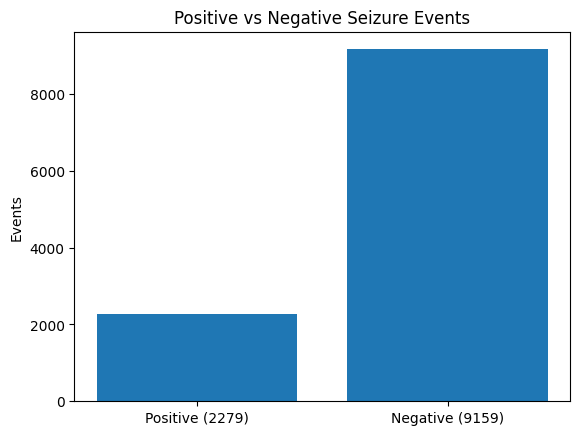

In [10]:
fig, ax = plt.subplots()
ax.hist(x=y, bins=[0.0, 0.5, 1.0, 1.5])
ax.set_title('Positive versus Negative')

# I like this better
fix, ax = plt.subplots()
counts = [X_pos.shape[0], X_neg.shape[0]]
count_lbls = [f'Positive ({counts[0]})', f'Negative ({counts[1]})']

ax.bar(count_lbls, counts)
ax.set_title("Positive vs Negative Seizure Events")
ax.set_ylabel('Events')


### Problem 3c (1 point)

Prune the dataset to balance the number of available labels so that they’re approximately equal in number, by discarding an appropriate number of randomly selected windows. Make sure to do the same for the data windows and the corresponding labels.

In [13]:
# use normalized data to create the normalized stuff

X_norm_df = pd.DataFrame(X_norm, columns=X.columns)
norm_df = X_norm_df.assign(y=y)
#print(norm_df)

X_neg_norm = norm_df.query('y == 0').reset_index(drop=True).iloc[:, :-1]
X_neg_norm_pruned = X_neg_norm.sample(counts[0]).to_numpy()
#scaler = preprocessing.StandardScaler().fit(X_neg_pruned)
# #X_neg_norm_pruned = scaler.transform(X_neg_pruned)

# #scaler = preprocessing.StandardScaler().fit(X_pos)
# #X_pos_norm = scaler.transform(X_pos)

X_pos_norm = norm_df.query('y == 1').reset_index(drop=True).iloc[:, :-1].to_numpy()
X_norm_pruned = np.concatenate((X_pos_norm, X_neg_norm_pruned))
#print(X_pos_norm)

# fig, ax = plt.subplots(2, 2)
# ax[0,0].plot(X_neg_norm.loc[0])
# ax[0,1].plot(X.loc[0])
# ax[1,0].plot(X_neg_norm.loc[1])
# ax[1,1].plot(X.loc[1])

Perform an FFT on each signal (i.e. for each row of the data array) and select from it frequencies in the relavent brainwave bands we discussed in class: delta (0.5 - 4 Hz), theta (4-8 Hz), alpha (8-12 Hz), beta (12-30 Hz) and gamma* (30-45 Hz). The FFT will sample the frequencies present in the signal at the frequencies corresponding to those returned by `scipy.fft.rfftfreq`.

Recall from 2b that the sampling frequency is `fs = 178`

\* Gamma Brainwaves happen above 30 Hz but these ranges' values are somewhat subjective. A lot of signals above 80 Hz are white noise. We just subjectively cut off the gamma frequencies at 45 Hz in this assignment.

See:

[`scipy.fft.rfft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html)


[`scipy.fft.rfftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html)

In [14]:
# based on the output of rfftfreq
F_INDICES = {
    'delta': range(0, 4),
    'theta': range(4, 8),
    'alpha': range(8, 12),
    'beta': range(12, 30),
    'gamma': range(30, 45)
}
# for i in range(0, 4):
#     F_INDICES[i] = 'delta'
# for i in range(4, 8):
#     F_INDICES[i] = 'theta'
# for i in range(8, 12):
#     F_INDICES[i] = 'alpha'
# for i in range(12, 30):
#     F_INDICES[i] = 'beta'
# for i in range(30, 45):
#     F_INDICES = 'gamma'
X_fft = []
y_fft = []
X_freq = {
    'delta': [],
    'theta': [],
    'alpha': [],
    'beta': [],
    'gamma': [],
}

# ft = fft.rfft(X_pos_norm[0])
# fq = fft.rfftfreq(178, 1/178)
# print(X_pos_norm[0])
# print(np.abs(ft))
# plt.plot(fq, np.abs(ft))
# ci = 0

for r in X_pos_norm:
    ft = fft.rfft(r)
    X_fft.append(ft)
    y_fft.append(1)
    for k in X_freq:
        a = [0 for n in range(178)]
        for i, v in enumerate(ft):
            if i in F_INDICES[k]:
                a[i] = v
        X_freq[k].append(a)

for r in X_neg_norm_pruned:
    ft = fft.rfft(r)
    X_fft.append(ft)
    y_fft.append(0)
    for k in X_freq:
        a = [0 for n in range(178)]
        for i, v in enumerate(ft):
            if i in F_INDICES[k]:
                a[i] = v
        X_freq[k].append(a)
        
print(len(X_fft))
print(X_norm_pruned.shape)

4558
(4558, 178)


### Problem 3e (1 point)

Create two datasets: one with the normalized signal and one transformed with the FFT. Split both into identical training and test sets (i.e. the same samples for the time and frequency dataset make up the test set).

See:

[`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [19]:
random_state = np.random.default_rng().integers(0, 42)
print(random_state)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = model_selection.train_test_split(X_norm_pruned, y_fft, test_size=0.25, random_state=random_state)
X_train_fft, X_test_fft, y_train_fft, y_test_fft = model_selection.train_test_split(X_fft, y_fft, test_size=0.25, random_state=random_state)

X_train_norm = np.abs(X_train_norm)
X_test_norm = np.abs(X_test_norm)
X_train_fft = np.abs(X_train_fft)
X_test_fft = np.abs(X_test_fft)

39


## Problem 4: Classification

### Problem 4a (1 point)

Write a function that calculates and prints the classification accuracy for a pair of (predicted, true) labels as a percentage.

See:

[`SVC.score`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

[`LinearDiscriminantAnalysis.score`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis.score)

In [20]:
def classification_accuracy1(pred, actual):
    print("{0:.0%}".format(metrics.accuracy_score(actual, pred)))
    
# why am I reinventing this
def classification_accuracy2(pred, actual):
    t, f = 0, 0
    for i, v in enumerate(pred):
        if v == actual[i]:
            t += 1
        else:
            f += 1
    print("{:.0%}".format((float(t) / float(t + f))))

### Problem 4b (1 point)

Train an LDA and an SVM on your two training sets.

See:

[`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[`sklearn.discriminant_analysis.LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [21]:
lda_fft = discriminant_analysis.LinearDiscriminantAnalysis()
lda_fft.fit(X_train_fft, y_train_fft)
pred_lda_fft = lda_fft.predict(X_test_fft)

lda_norm = discriminant_analysis.LinearDiscriminantAnalysis()
lda_norm.fit(X_train_norm, y_train_norm)
pred_lda_norm = lda_norm.predict(X_test_norm)

svc_fft = svm.SVC()
svc_fft.fit(X_train_fft, y_train_fft)
pred_svc_fft = svc_fft.predict(X_test_fft)

svc_norm = svm.SVC()
svc_norm.fit(X_train_norm, y_train_norm)
pred_svc_norm = svc_norm.predict(X_test_norm)


### Problem 4c (1 point)

For each trained classifier, show the % accuracy on your test set, using the function you wrote. Does using the spectral analysis improve the accuracy? 

Plot or print a confusion matrix for each testing set (time series and frequency band). 

See: 

[`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[What is a confusion matrix](https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5)

The spectral analysis seems to improve the accuracy slightly.

90%
87%
98%
96%


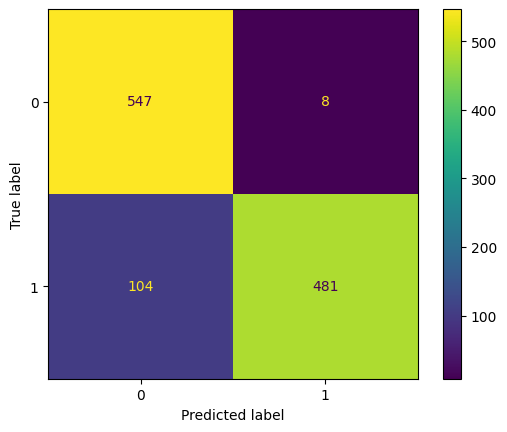

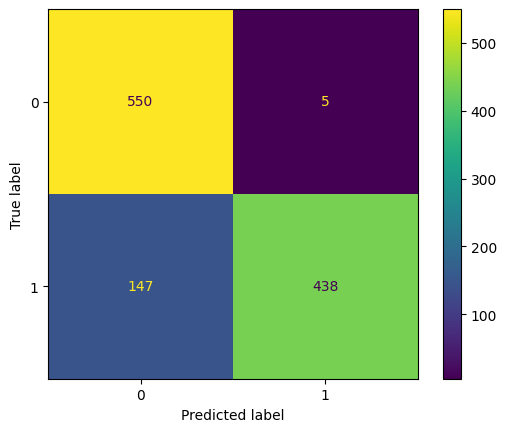

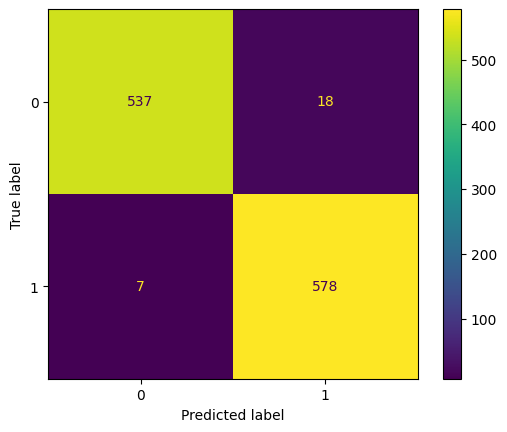

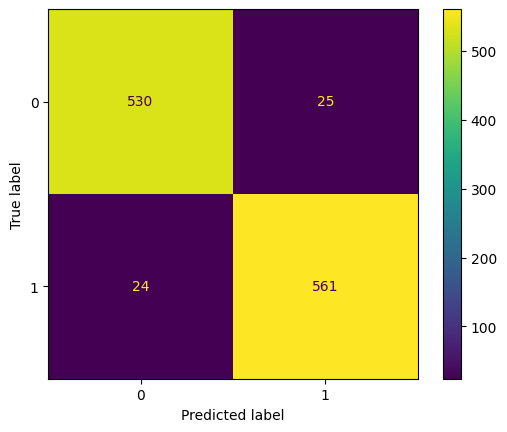

In [22]:
classification_accuracy2(pred_lda_fft, y_test_fft)
classification_accuracy2(pred_lda_norm, y_test_fft)
classification_accuracy1(pred_svc_fft, y_test_fft)
classification_accuracy1(pred_svc_norm, y_test_fft)

mtr_lda_fft = metrics.confusion_matrix(y_test_fft, pred_lda_fft)
mtr_lda_norm = metrics.confusion_matrix(y_test_norm, pred_lda_norm)
mtr_svc_fft = metrics.confusion_matrix(y_test_fft, pred_svc_fft)
mtr_svc_norm = metrics.confusion_matrix(y_test_norm, pred_svc_norm)


cmd_lda_fft = metrics.ConfusionMatrixDisplay(mtr_lda_fft).plot()
cmd_lda_norm = metrics.ConfusionMatrixDisplay(mtr_lda_norm).plot()
cmd_svc_fft = metrics.ConfusionMatrixDisplay(mtr_svc_fft).plot()
cmd_svc_norm = metrics.ConfusionMatrixDisplay(mtr_svc_norm).plot()

### Problem 4d (1 point)

Now, train classifiers using different ratios of training/testing set size. For example, starting with 90%/10% training/testing split, and iterating down to say 10% training data, 90% test data. What do you observe? Plot the test set accuracy for each of the two classifier types as a function of the train/test ratio.

See the methods of:

[`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[`sklearn.lda.LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)


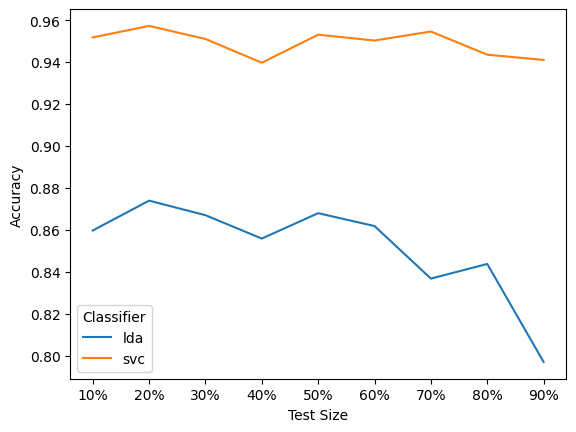

In [28]:
results = {
  'test_size': [],
  'lda': [],
  'svc': []
}

for test_size in np.arange(0.1, 1.0, 0.1):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_pruned, y_fft, test_size=test_size)
  #X_train, X_test, y_train, y_test = model_selection.train_test_split(X_fft, y_fft, test_size=test_size)

  X_train = np.abs(X_train)
  X_test = np.abs(X_test)
  
  svc = svm.SVC()
  lda = discriminant_analysis.LinearDiscriminantAnalysis()

  svc.fit(X_train, y_train)
  lda.fit(X_train, y_train)

  pred_svc = svc.predict(X_test)
  pred_lda = lda.predict(X_test)
  
  results['test_size'].append("{:.0%}".format(test_size))
  results['lda'].append(metrics.accuracy_score(y_test, pred_lda))
  results['svc'].append(metrics.accuracy_score(y_test, pred_svc))

  #classification_accuracy1(pred_lda, y_test_norm)
  #classification_accuracy2(pred_svc, y_test_norm)

# plot
plt.plot('test_size', 'lda', data=results)
plt.plot('test_size', 'svc', data=results)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend(title='Classifier')

### Problem 4e (1 point)

Re-train the classifiers (using either the signal or its spectral components) without balancing the number of labels (i.e. the way the data originally appeared). Is there a difference in performance on the test set? Explain why.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
svc = svm.SVC()
lda = discriminant_analysis.LinearDiscriminantAnalysis()
svc.fit(X_train, y_train)
lda.fit(X_train, y_train)

pred_svc = svc.predict(X_test)
pred_lda = lda.predict(X_test)

classification_accuracy1(pred_svc, y_test)
classification_accuracy1(pred_lda, y_test)

**On my computer, the pruned data took 0.4s to run and this took 1.0s to run. More data means worse performance because there is more to go through.**

### Problem 5a (2.5 points)

In a couple of paragraphs, discuss the two points:

What are the assumptions used by the two classifiers? How do you think they affect their relative performance on this dataset?

Why would we want to scale data to have zero mean in machine learning tasks?

See: 

[`SVM Tutorial`](https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)

[`LDA Tutorial`](http://www.sci.utah.edu/~shireen/pdfs/tutorials/Elhabian_LDA09.pdf)


The assumptions made by the two classifiers are somewhat similar. They assume the data can be divided into discrete sets, the features are independent, and that the sample variance is roughly the same for each class. The linear discriminant analysis also prefers normality, although that doesn't seem to be a huge factor. Support vector classification assumes the classes are linearly separable, so that may be why it is performing slightly better than LDA in this case.

Scaling the data allows all of it to be treated similarly, reducing the cost of delineating differences and similarities, and reducing bias.

### Problem 5b (2.5 points)

Computational time is a major consideration for real-time applications of machine learning. Use python’s `timeit.timeit` function to measure how long each classifier takes to converge for multiple iterations (this influences resources that need to be dedicated to training the model), and how long it takes to classify the test data (which affects loop performance). 

Fix your `test_size` to be 0.2. Get the average time for fitting over 100 runs (go make a hot pocket or something in the meantime since it'll take 1-2 mins). Also get the average time for running prediction over 300 runs (this will also take some time).

If you reuse the same test and training set every time you might get warnings about caching. You can simply redo the train test split every time. It's okay to include the time it takes to do the train test split since that's going to be the same across the two training functions and we're just trying to compare the two.

In some scenarios, you might need to run more data-hungry and computationally expensive models. Discuss the trade-off between computational time and accuracy in real-time applications, such as applying electrical stimulation in response to seizure onsets.

See:

[`timeit.timeit`](https://docs.python.org/3.8/library/timeit.html)

[Magic Timeit](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)

In [30]:
%%timeit -r100 svc = svm.SVC()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_pruned, y_fft, test_size=0.2)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
classification_accuracy1(pred, y_test)

0.9539473684210527
0.9649122807017544
0.9517543859649122
0.9638157894736842
0.9539473684210527
0.9583333333333334
0.9572368421052632
0.9583333333333334
0.9495614035087719
0.9583333333333334
0.9605263157894737
0.9692982456140351
0.9528508771929824
0.9572368421052632
0.9418859649122807
0.9550438596491229
0.9484649122807017
0.9539473684210527
0.9638157894736842
0.9594298245614035
0.9364035087719298
0.9627192982456141
0.9572368421052632
0.956140350877193
0.9616228070175439
0.9594298245614035
0.9506578947368421
0.9539473684210527
0.9605263157894737


KeyboardInterrupt: 

In [26]:
%%timeit r=100 lda = discriminant_analysis.LinearDiscriminantAnalysis()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm_pruned, y_fft, test_size=0.2)
lda.fit(X_train, y_train)
pred = lda.predict(X_test)
classification_accuracy1(pred, y_test)

22.6 s ± 2.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
